<p style="font-size:200%;font-weight:bold">加密货币数据处理</p>

- 作者：丁文治
- 日期：2022年3月13日

In [1]:
import os

import pandas as pd
import numpy as np

ROOT = "/home/team_crypto/2022_crypto_return/"
DB = f"{ROOT}03_wdata/1100_coingecko/price/"
WD = f"{ROOT}03_wdata/0001_teaching/"

# 读入数据

In [2]:
df = pd.read_parquet(f'{DB}bitcoin.pq')
df.shape
df.sample(3)

(2989, 7)

,time,prices,market_caps,total_volumes,id,symbol,name
1349,2017-09-12,4130.956285,6.841514e+10,1.062537e+09,bitcoin,btc,Bitcoin
1158,2017-03-05,1276.233000,2.067386e+10,6.209018e+07,bitcoin,btc,Bitcoin
2467,2020-10-04,10546.656255,1.951883e+11,1.603983e+10,bitcoin,btc,Bitcoin


<AxesSubplot:xlabel='time'>

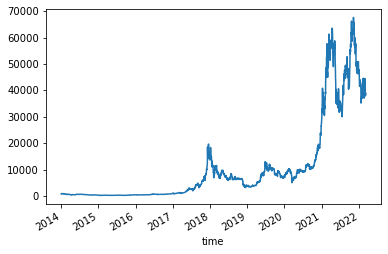

In [3]:
df.set_index('time', inplace=True)
df['prices'].plot()

# 合并数据

In [4]:
df_lst = []

for file in os.listdir(DB):
    if '.pq' not in file: continue
    df_lst.append(pd.read_parquet(f'{DB}{file}'))

dfm = pd.concat(df_lst)
dfm.shape
dfm.sample(3)

(5183377, 7)

,time,prices,market_caps,total_volumes,id,symbol,name
468,2018-09-25,0.946146,3.019853e+07,1.653492e+05,aragon,ant,Aragon
377,2021-03-05,0.021658,1.302457e+08,1.478633e+06,edgeware,edg,Edgeware
459,2021-10-18,7.993647,2.473214e+08,1.861577e+07,orion-protocol,orn,Orion Protocol


In [5]:
dfm.to_parquet(f'{WD}1100_crypto.pq')

# 处理异常值

In [6]:
df = pd.read_parquet(f'{WD}1100_crypto.pq')
df.shape
df.sample(3)

(5183377, 7)

,time,prices,market_caps,total_volumes,id,symbol,name
216,2021-12-26,0.191413,0.000000e+00,2.212840e+06,binance-peg-dogecoin,doge,Binance-Peg Dogecoin
150,2021-08-15,0.022273,0.000000e+00,8.344616e+05,etherland,eland,Etherland
109,2021-07-17,0.997373,2.186362e+08,1.812535e+06,alchemix-usd,alusd,Alchemix USD


In [7]:
df.duplicated(subset=['time', 'id']).sum()

0

<AxesSubplot:xlabel='time'>

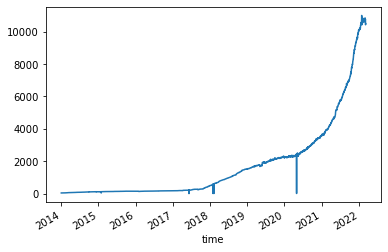

In [8]:
df.groupby(['time'])['id'].nunique().plot()

In [9]:
df.groupby(['time'])['id'].nunique().pct_change().sort_values().head(10)  # 可能是因为时间戳没有取整到天

time
2020-04-29 17:00:41.760   -0.999583
2018-02-08 00:05:00.253   -0.998261
2018-01-30 00:05:00.381   -0.998258
2017-06-08 23:39:21.692   -0.995122
2017-06-06 23:29:55.701   -0.995098
2015-01-28 00:00:00.000   -0.723214
2018-02-08 00:05:29.672   -0.500000
2018-01-30 00:05:28.871   -0.500000
2018-01-30 00:05:28.744   -0.500000
2018-02-08 00:05:21.414   -0.500000
Name: id, dtype: float64

In [10]:
df['time_round'] = df['time'].dt.round(freq='D')
df.sample(3)

,time,prices,market_caps,total_volumes,id,symbol,name,time_round
277,2020-04-29,0.000310,0.0,1.334403,antra,antr,Antra,2020-04-29
687,2020-12-03,0.000481,0.0,378551.642210,kronn,krex,Kronn,2020-12-03
767,2020-11-11,0.000030,0.0,3062.458473,swtcoin,swat,SWTCoin,2020-11-11


<AxesSubplot:xlabel='time_round'>

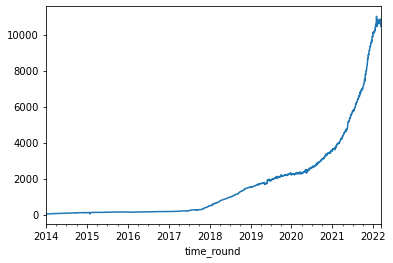

In [11]:
df.groupby(['time_round'])['id'].nunique().plot()  # 修复

In [12]:
df.groupby(['time_round'])['id'].nunique().pct_change().sort_values().head(10)  # 仍有2个异常但应该影响不大了

time_round
2015-01-28   -0.723214
2014-10-01   -0.151515
2014-12-11   -0.145455
2014-01-10   -0.111111
2016-01-30   -0.100000
2014-12-12   -0.095745
2014-01-25   -0.085714
2014-01-21   -0.085714
2017-09-02   -0.083969
2014-01-04   -0.083333
Name: id, dtype: float64

In [13]:
df.loc[df['time_round'] == '2015-01-27', 'time'].value_counts()
df.loc[df['time_round'] == '2015-01-28', 'time'].value_counts()  # 周三
df.loc[df['time_round'] == '2015-01-29', 'time'].value_counts()

df.loc[df['time_round'] == '2017-04-01', 'time'].value_counts()
df.loc[df['time_round'] == '2017-04-02', 'time'].value_counts()  # 周日
df.loc[df['time_round'] == '2017-04-03', 'time'].value_counts()
# 选取周五作为每周终止时间可以避开这两个异常

2015-01-27    112
Name: time, dtype: int64

2015-01-28    31
Name: time, dtype: int64

2015-01-29    112
Name: time, dtype: int64

2017-04-01    187
Name: time, dtype: int64

2017-04-02    187
Name: time, dtype: int64

2017-04-03    186
Name: time, dtype: int64

In [14]:
df.drop(columns=['time'], inplace=True)
df.rename(columns={'time_round': 'time'}, inplace=True)
df.sample(3)

,prices,market_caps,total_volumes,id,symbol,name,time
2190,0.152679,1.048554e+07,1.784020e+06,nav-coin,nav,Navcoin,2020-06-12
341,0.067274,1.804815e+07,8.045435e+05,howdoo,udoo,Hyprr (Howdoo),2019-09-18
200,0.000248,0.000000e+00,5.949160e-01,macoin,beck,Macoin,2022-03-06


In [15]:
df.to_parquet(f'{WD}1101_crypto_fix_time.pq')

# 筛选数据

> Liu, Yukun, Aleh Tsyvinski, and Xi Wu, 2022, Common Risk Factors in Cryptocurrency, Journal of Finance.


In [16]:
df = pd.read_parquet(f'{WD}1101_crypto_fix_time.pq')
df.shape
df.sample(3)

(5183377, 7)

,prices,market_caps,total_volumes,id,symbol,name,time
106,5.596567,0.000000e+00,100999.537003,ownix,onx,Ownix,2021-11-18
493,0.061758,1.356733e+06,18924.886497,matryx,mtx,MATRYX,2019-05-27
301,178.266418,0.000000e+00,0.000000,siambitcoin,sbtc,SiamBitcoin,2019-10-06


In [17]:
df['id'].nunique()
df['symbol'].nunique()
df['name'].nunique()

12649

10680

12649

<AxesSubplot:>

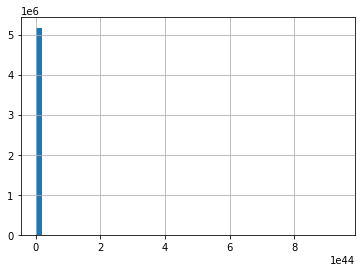

In [18]:
df['daily_ret'] = df.groupby(['id'])['prices'].pct_change()
pl1 = df.groupby(['id'])['prices'].shift()
df.loc[pl1 == 0, 'daily_ret'] = np.nan
df['daily_ret'].hist(bins=50)

## 缺失值

价格、市值、交易量不缺失

In [19]:
df.isna().sum()

prices               0
market_caps        293
total_volumes       40
id                   0
symbol             667
name                 0
time                 0
daily_ret        12702
dtype: int64

In [20]:
df.dropna(subset=['prices', 'market_caps', 'total_volumes'], how='any', inplace=True)
df.isna().sum()

prices               0
market_caps          0
total_volumes        0
id                   0
symbol             667
name                 0
time                 0
daily_ret        12701
dtype: int64

In [21]:
df.to_parquet(f'{WD}1102_crypto_day.pq')

## 小市值

排除市值小于100万美元的加密货币

In [22]:
df['gt_1m'] = (df['market_caps'] >= 10 ** 6)
df.groupby(['id'])['gt_1m'].agg(['nunique', 'max']).value_counts()

nunique  max  
1        False    8794
2        True     3525
1        True      330
dtype: int64

In [23]:
df.sample()

,prices,market_caps,total_volumes,id,symbol,name,time,daily_ret,gt_1m
1195,8.372038,8.949896e+07,268587.976631,dero,dero,Dero,2021-07-05,0.029687,True


- 一定排除：8794个币，市值始终小于100万美元
- **如何处理？**：3525个币，在观测周期内同时有大于100万美元和小于100万美元
- 一定保留：330个币始终超过100万美元

In [24]:
# 从投资组合的角度：先直接以100万美元划线
df2 = df.loc[df['gt_1m']].copy()
df2.shape
df2.sample(3)

(1600069, 9)

,prices,market_caps,total_volumes,id,symbol,name,time,daily_ret,gt_1m
254,1.120508,1.385094e+07,9.498323e+05,stasis-eurs,eurs,STASIS EURO,2019-04-11,0.004932,True
150,294.583785,1.861749e+07,1.985080e+06,cover-protocol,cover,Cover Protocol,2021-06-04,0.007741,True
112,1.365201,1.375108e+07,2.377305e+05,oiler,oil,Oiler,2021-08-26,-0.114455,True


## 周频

每周保留最接近周五的数据

In [25]:
df2.duplicated(subset=['time', 'id']).sum()

3

In [26]:
df2[['year', 'week', 'day']] = df2['time'].dt.isocalendar()
df2.sample(3)

,prices,market_caps,total_volumes,id,symbol,name,time,daily_ret,gt_1m,year,week,day
94,15.149634,2.167802e+07,401407.784835,spartacus,spa,Spartacus,2022-02-04,-0.054057,True,2022,5,5
93,0.254651,9.549422e+07,488205.971194,hiveterminal,hvn,Hiveterminal token,2018-01-19,0.012794,True,2018,3,5
405,26.455324,5.770925e+07,36839.210602,index-cooperative,index,Index Cooperative,2021-11-16,-0.027364,True,2021,46,2


In [27]:
df2['day'].value_counts()

3    229448
2    229051
1    228699
7    228459
6    228368
5    228123
4    227921
Name: day, dtype: Int64

In [28]:
df3 = df2.copy()
df3['time_tmp'] = df3['time'] + pd.offsets.Day(2)
df3[['year', 'week', 'day']] = df3['time_tmp'].dt.isocalendar()

df3.sort_values(['id', 'year', 'week', 'day'], ascending=True, inplace=True)
df3['unit_volumes'] = df3['total_volumes'] / df3['prices']
# df3['daily_ret'] = df3.groupby(['time'])['prices'].pct_change()  # 不能在这里算日回报，因为已经丢过一部分样本了，日期序列不连续了

df3.sample(3)

,prices,market_caps,total_volumes,id,symbol,name,time,daily_ret,gt_1m,year,week,day,time_tmp,unit_volumes
826,0.003850,4.057067e+06,1.931985e+06,skrumble-network,skm,Skrumble Network,2020-08-14,-0.133947,True,2020,33,7,2020-08-16,5.017647e+08
55,4.068595,3.621049e+06,1.023334e+05,game-ace-token,gat,Game Ace Token,2021-09-12,-0.129104,True,2021,37,2,2021-09-14,2.515201e+04
239,0.000848,1.281077e+06,2.617026e+03,dinastycoin,dcy,Dinastycoin,2018-03-09,-0.152096,True,2018,10,7,2018-03-11,3.086563e+06


In [29]:
df3 = df3.groupby(['id', 'year', 'week']).agg({
    'time': 'last',
    'prices': ['last', 'max'],
    'market_caps': 'last',
    'total_volumes': ['mean', 'last', 'std'],
    'unit_volumes': 'mean',
    'daily_ret': ['mean', 'max', 'std'],
    'symbol': 'last',
    'name': 'last',
})
df3.columns = [
    'time', 
    'prices', 'max_prices', 
    'market_caps', 
    'avg_volumes', 'eow_volumes', 'std_volumes',
    'unit_volumes', 
    'avg_daily_ret', 'max_daily_ret', 'std_daily_ret', 
    'symbol', 'name'
]
df3['day'] = df3['time'].dt.isocalendar().day
df3.shape
df3.sample(3)

(240380, 14)

,,,time,prices,max_prices,market_caps,avg_volumes,eow_volumes,std_volumes,unit_volumes,avg_daily_ret,max_daily_ret,std_daily_ret,symbol,name,day
id,year,week,,,,,,,,,,,,,,
babb,2018,52,2018-12-28,0.000386,0.000446,1.161438e+07,57164.753158,30676.294213,30578.011164,1.361602e+08,-0.012771,0.084670,0.077945,bax,BABB,5
ambire-wallet,2022,10,2022-03-09,0.109386,0.125791,5.944040e+06,273514.541096,176060.952057,170494.753565,2.338624e+06,-0.009133,0.143367,0.089510,wallet,Ambire Wallet,3
vericoin,2018,28,2018-07-13,0.165389,0.216932,5.137003e+06,181018.516630,148403.131095,27321.817114,9.498945e+05,-0.028997,0.119437,0.082792,vrc,VeriCoin,5


In [30]:
df3['day'].value_counts() / df3.shape[0]  # 2%的样本用了周二及之前，应该问题不大，可能使强行筛100万美元市值导致的偏误

5    0.949006
3    0.017169
4    0.012742
2    0.006735
1    0.006032
7    0.004468
6    0.003848
Name: day, dtype: Float64

## 输出

In [31]:
df3.reset_index(inplace=True) 
df3.shape
df3.sample(3)

(240380, 17)

,id,year,week,time,prices,max_prices,market_caps,avg_volumes,eow_volumes,std_volumes,unit_volumes,avg_daily_ret,max_daily_ret,std_daily_ret,symbol,name,day
192697,spore,2022,7,2022-02-18,7.792015e-11,8.338334e-11,2.800716e+06,5674.518157,3472.607754,4714.056319,7.245611e+13,-0.003247,0.072413,0.049543,spore,Spore,5
191715,spectrecoin,2020,31,2020-07-31,1.101289e-01,1.137970e-01,2.922587e+06,159153.801207,191504.245284,31299.847953,1.699441e+06,0.047599,0.156687,0.072421,alias,Alias,5
98368,horizon-protocol,2021,32,2021-08-13,1.962450e-01,1.965760e-01,7.885353e+06,195081.103657,145145.141559,35677.984720,1.085492e+06,0.024693,0.085984,0.063435,hzn,Horizon Protocol,5


In [32]:
df3.to_parquet(f'{WD}1103_crypto_week.pq')

# 描述统计

In [33]:
df = pd.read_parquet(f'{WD}1103_crypto_week.pq')
df.shape
df.sample(3)

(240380, 17)

,id,year,week,time,prices,max_prices,market_caps,avg_volumes,eow_volumes,std_volumes,unit_volumes,avg_daily_ret,max_daily_ret,std_daily_ret,symbol,name,day
188541,smooth-love-potion,2020,39,2020-09-25,0.047643,0.047643,1.017902e+06,3.081499e+05,3.081499e+05,NaN,6.467858e+06,0.170349,0.170349,NaN,slp,Smooth Love Potion,5
63175,digix-gold,2022,8,2022-02-25,34.739195,35.477013,1.139202e+06,4.475684e+03,1.509063e+03,6232.85192,1.293822e+02,0.002918,0.037910,0.021725,dgx,Digix Gold,5
73717,enjincoin,2018,32,2018-08-10,0.045110,0.049613,3.432823e+07,1.334971e+06,1.632973e+06,436474.90675,2.824784e+07,-0.016166,0.043940,0.050045,enj,Enjin Coin,5


<AxesSubplot:xlabel='year'>

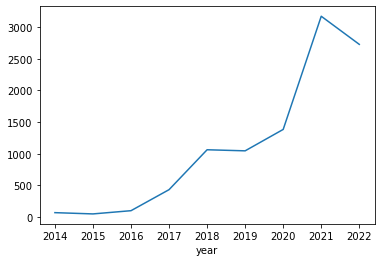

In [34]:
df.groupby(['year'])['id'].nunique().plot()
# LTW (2022 JF)显示2018年是高峰，2020年数量腰斩，CoinGecko的数据显然不支持这个描述
# 后续描述统计发现主要是因为CoinGecko对早期数据的覆盖不好
# LTW (2022 JF)的研究截止在了2020年中期，错过了一大波后续的加密货币市场热潮，更广的覆盖度、更新的市场数据可以成为本研究的一个贡献

In [35]:
ltw = df.loc[df['time'].between('2014-01-01', '2020-07-31')].copy()
ltw['avg_volumes'] = ltw['avg_volumes'] / 10 ** 3
ltw['market_caps'] = ltw['market_caps'] / 10 ** 6
ltw.shape
ltw.sample(3)

(102408, 17)

,id,year,week,time,prices,max_prices,market_caps,avg_volumes,eow_volumes,std_volumes,unit_volumes,avg_daily_ret,max_daily_ret,std_daily_ret,symbol,name,day
63348,digixdao,2019,32,2019-08-09,24.957127,24.957127,49.959499,2340.383476,3.975828e+06,7.843939e+05,1.088801e+05,0.045493,0.137034,0.066628,dgd,DigixDAO,5
89660,gifto,2020,8,2020-02-21,0.012464,0.015271,8.258599,15117.145886,1.330704e+07,6.342967e+06,1.062471e+09,-0.022739,0.039177,0.034520,gto,Gifto,5
54705,daps-token,2019,52,2019-12-27,0.000059,0.000083,3.530294,64.094782,5.755913e+04,2.757550e+04,1.058021e+09,0.074150,0.352487,0.204270,daps,DAPS Coin,5


## 规模

In [36]:
# LTW (2022 JF) Table 1
ltw.groupby(['year']).agg({
    'id': 'nunique',
    'market_caps': ['mean', 'median'],
    'avg_volumes': ['mean', 'median'],
})

id market_caps               avg_volumes            
     nunique        mean     median           mean      median
year                                                          
2014      69  279.283936   4.468244    2120.809354   42.684782
2015      49  182.182583   4.541816   11516.562831   14.577912
2016     100  199.724404   3.710771   37818.996662   27.363664
2017     432  711.485454  14.461603   21532.355465  224.851310
2018    1062  471.558721  12.042173   22456.830961  206.039498
2019    1045  316.999742   5.392450  104908.383799  260.743527
2020     914  391.578806   5.167135  183705.527154  384.014437

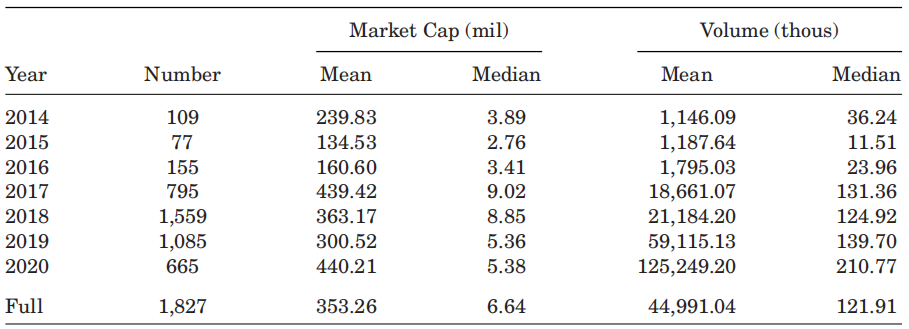

大致可比，差异可能主要来自于CoinGecko早期的覆盖度不佳

## 回报率

In [37]:
ltw['market_caps_l1'] = ltw.groupby('id')['market_caps'].shift()

### Log Return

In [38]:
# (ltw['prices'] == 0).sum()

In [39]:
# ltw['prices_l1'] = ltw.groupby(['id'])['prices'].shift()
# ltw['ret'] = np.log(ltw['prices']) - np.log(ltw['prices_l1'])
# ltw['ret'].hist(bins=50)

In [40]:
# ltw.loc[ltw['ret'] <= -2, 'ret'] = -2
# ltw.loc[ltw['ret'] >= 2, 'ret'] = 2
# ltw['ret'].hist(bins=50)

### Pct Return

<AxesSubplot:>

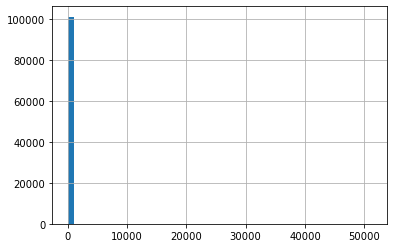

In [41]:
ltw['ret'] = ltw.groupby(['id'])['prices'].pct_change()
ltw['ret'].hist(bins=50)

<AxesSubplot:>

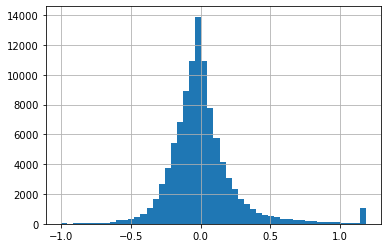

In [42]:
# ltw.loc[ltw['ret'] <= ltw['ret'].quantile(0.01), 'ret'] = ltw['ret'].quantile(0.01)
ltw.loc[ltw['ret'] >= ltw['ret'].quantile(0.99), 'ret'] = ltw['ret'].quantile(0.99)
ltw['ret'].hist(bins=50)

In [43]:
ltw.loc[ltw['symbol'] == 'btc'].tail(3)

,id,year,week,time,prices,max_prices,market_caps,avg_volumes,eow_volumes,std_volumes,unit_volumes,avg_daily_ret,max_daily_ret,std_daily_ret,symbol,name,day,market_caps_l1,ret
23678,bitcoin,2020,29,2020-07-17,9136.483376,9297.479636,168496.782961,1.775497e+07,1.876048e+10,1.131628e+09,1.922800e+06,-0.001528,0.006840,0.005727,btc,Bitcoin,5,170198.606144,-0.010744
23679,bitcoin,2020,30,2020-07-24,9589.817719,9589.817719,176821.599774,1.886022e+07,2.696615e+10,3.971590e+09,2.019836e+06,0.006980,0.024142,0.009445,btc,Bitcoin,5,168496.782961,0.049618
23680,bitcoin,2020,31,2020-07-31,11116.307164,11116.307164,205200.775318,2.864144e+07,2.226538e+10,7.068406e+09,2.766322e+06,0.021916,0.104426,0.038199,btc,Bitcoin,5,176821.599774,0.159178


### 对比

In [44]:
mkt = ltw.copy()
mkt['wgt_ret'] = mkt['market_caps_l1'] * mkt['ret']  # 注意此处应用上一期的market cap作为权重
mkt = mkt.groupby(['year', 'week'])[['wgt_ret', 'market_caps_l1']].sum()
mkt['mkt'] = mkt['wgt_ret'] / mkt['market_caps_l1']
mkt.tail(3)
mkt.shape
mkt = mkt.loc[:, ['mkt']]
mkt.sample(3)

wgt_ret  market_caps_l1       mkt
year week                                        
2020 29    -2335.355541   275702.388465 -0.008471
     30    16781.746301   274226.096927  0.061197
     31    40444.128895   291618.271536  0.138689

(344, 3)

,,mkt
year,week,
2015,4,0.112492
2017,38,0.013155
2015,39,-0.001201


In [45]:
rets = {'mkt': mkt}

for sym in ['btc', 'xrp', 'eth']:
    tmp = ltw.loc[ltw['symbol'] == sym, ['year', 'week', 'ret']].set_index(['year', 'week']).rename(columns={'ret': sym})
    tmp.shape
    rets[sym] = tmp

rets = pd.concat(rets.values(), axis=1)
rets.shape
rets.sample(3)

(344, 1)

(344, 1)

(260, 1)

(344, 4)

,,mkt,btc,xrp,eth
year,week,,,,
2017,3,0.080317,0.081213,0.011034,0.093169
2019,47,-0.122139,-0.117837,-0.093169,-0.127913
2015,29,-0.034587,-0.023330,-0.093365,NaN


In [46]:
pd.concat([rets.describe(percentiles=[]).T, rets.skew().rename('skewness').to_frame(), rets.kurtosis().rename('kurtosis').to_frame()], axis=1)
# 基本能匹配，市场回报率偏差大一些，可能是winsorize的选择不同

,count,mean,std,min,50%,max,skewness,kurtosis
mkt,343.0,0.011204,0.100153,-0.447446,0.006756,0.353736,0.039375,1.771694
btc,343.0,0.012732,0.101918,-0.431014,0.007820,0.537689,0.387283,3.074798
xrp,343.0,0.022692,0.214870,-0.504629,-0.015577,1.185344,2.886260,11.495856
eth,259.0,0.036111,0.198088,-0.515094,-0.001362,1.185344,2.252047,9.606756


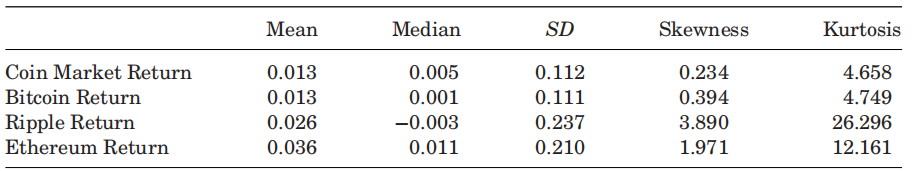

## 走势

In [47]:
rets += 1

In [48]:
cum_rets = rets.cumprod() - 1

<AxesSubplot:xlabel='year,week'>

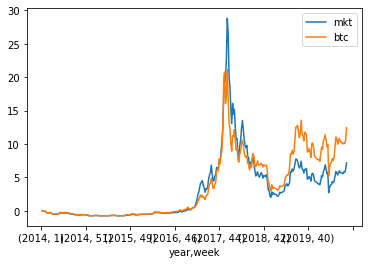

In [49]:
cum_rets[['mkt', 'btc']].plot()

<AxesSubplot:xlabel='year,week'>

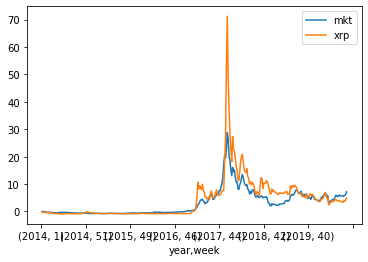

In [50]:
cum_rets[['mkt', 'xrp']].plot()

<AxesSubplot:xlabel='year,week'>

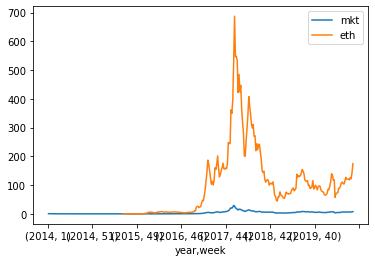

In [51]:
cum_rets[['mkt', 'eth']].plot()

基本与LTW (2022 JF)匹配，数据可用。